# Human development index

## Libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


## Load Dataset / Separate

In [3]:
hdi_dataSet=pd.read_csv("hdi.csv")
hdi_dataSet_2021 = hdi_dataSet[["Country"] + [col for col in hdi_dataSet.columns if "(2021)" in col]]

In [4]:
print(hdi_dataSet_2021.shape)
print(hdi_dataSet_2021.columns)
hdi_dataSet_2021

(195, 36)
Index(['Country', 'HDI Rank (2021)', 'Human Development Index (2021)',
       'Life Expectancy at Birth (2021)', 'Expected Years of Schooling (2021)',
       'Mean Years of Schooling (2021)',
       'Gross National Income Per Capita (2021)', 'GDI Group (2021)',
       'Gender Development Index (2021)', 'HDI female (2021)',
       'Life Expectancy at Birth, female (2021)',
       'Expected Years of Schooling, female (2021)',
       'Mean Years of Schooling, female (2021)',
       'Gross National Income Per Capita, female (2021)', 'HDI male (2021)',
       'Life Expectancy at Birth, male (2021)',
       'Expected Years of Schooling, male (2021)',
       'Mean Years of Schooling, male (2021)',
       'Gross National Income Per Capita, male (2021)',
       'Inequality-adjusted Human Development Index (2021)',
       'Coefficient of human inequality (2021)', 'Overall loss (%) (2021)',
       'Inequality in life expectancy (2021)', 'Inequality in eduation (2021)',
       'Inequalit

,Country,HDI Rank (2021),Human Development Index (2021),Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021),GDI Group (2021),Gender Development Index (2021),HDI female (2021),...,Gender Inequality Index (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (2021)","Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)","Labour force participation rate, female (% ages 15 and older) (2021)","Labour force participation rate, male (% ages 15 and older) (2021)",Difference from HDI rank (2021),Planetary pressures-adjusted Human Development Index (2021),Difference from HDI value (%) (2021),Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021)
0,Afghanistan,180.0,0.478,61.9824,10.263844,2.985070,1824.190915,5.0,0.681,0.364840,...,0.678,638.0,82.565,14.848,66.515,5.0,0.474,0.836820,0.312376,1.38
1,Angola,148.0,0.586,61.6434,12.172100,5.417391,5465.617791,4.0,0.903,0.556745,...,0.537,241.0,138.402,73.968,79.071,10.0,0.577,1.535836,0.675410,2.18
2,Albania,67.0,0.796,76.4626,14.448000,11.286455,14131.110390,1.0,1.007,0.799222,...,0.144,15.0,14.517,50.733,66.154,28.0,0.739,7.160804,1.575754,12.96
3,Andorra,40.0,0.858,80.3684,13.300239,10.555120,51166.626610,NaN,NaN,NaN,...,NaN,NaN,5.887,NaN,NaN,NaN,NaN,NaN,6.034945,NaN
4,United Arab Emirates,26.0,0.911,78.7104,15.717690,12.694030,62573.591810,2.0,0.953,0.877132,...,0.049,3.0,3.085,46.542,88.003,-105.0,0.518,43.139407,15.193336,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,111.0,0.707,72.7675,12.418859,11.403800,5307.953374,2.0,0.957,0.685493,...,0.418,43.0,43.589,30.700,54.237,NaN,NaN,NaN,1.238975,NaN
191,Yemen,183.0,0.455,63.7534,9.098710,3.200000,1314.270189,5.0,0.496,0.262570,...,0.820,164.0,54.404,5.995,67.637,1.0,0.448,1.538462,0.327510,2.89
192,South Africa,109.0,0.713,62.3410,13.643710,11.373160,12948.373250,3.0,0.944,0.685864,...,0.405,119.0,61.206,46.212,59.883,6.0,0.648,9.116410,7.620420,7.55
193,Zambia,154.0,0.565,61.2234,10.928760,7.187091,3217.767739,2.0,0.965,0.554427,...,0.540,213.0,117.017,69.230,77.847,7.0,0.557,1.415929,0.357535,2.38


## pre processing

### Missing Value managing

In [5]:
missing_columns_list=[]
for col in hdi_dataSet_2021.columns:
    missing_percentage = (hdi_dataSet_2021[col].isna().sum() / hdi_dataSet_2021.shape[0]) * 100
    if missing_percentage > 0:
        print(f"{col} missing percentage:\t{missing_percentage}%")
        missing_columns_list.append(col)
    else:
        hdi_dataSet_2021.dropna(subset=[col], inplace=True)


HDI Rank (2021) missing percentage:	2.051282051282051%
Human Development Index (2021) missing percentage:	2.051282051282051%
Expected Years of Schooling (2021) missing percentage:	1.0256410256410255%
Mean Years of Schooling (2021) missing percentage:	2.051282051282051%
Gross National Income Per Capita (2021) missing percentage:	1.0256410256410255%
GDI Group (2021) missing percentage:	11.794871794871794%
Gender Development Index (2021) missing percentage:	11.794871794871794%
HDI female (2021) missing percentage:	11.794871794871794%
Expected Years of Schooling, female (2021) missing percentage:	3.076923076923077%
Mean Years of Schooling, female (2021) missing percentage:	8.205128205128204%
Gross National Income Per Capita, female (2021) missing percentage:	8.205128205128204%
HDI male (2021) missing percentage:	11.794871794871794%
Expected Years of Schooling, male (2021) missing percentage:	3.076923076923077%
Mean Years of Schooling, male (2021) missing percentage:	8.205128205128204%
Gros

In [6]:
for col in missing_columns_list:

    missing_value_percentage=(hdi_dataSet_2021.loc[:,col].isna().sum()/hdi_dataSet_2021.shape[0])*100

    if (missing_value_percentage)<0.5:
        hdi_dataSet_2021=hdi_dataSet_2021[hdi_dataSet_2021.loc[:,col].notna()]

    elif hdi_dataSet_2021.loc[:,col].dtype == np.float64 or hdi_dataSet_2021.loc[:,col].dtype == np.int64:
        median_col=hdi_dataSet_2021.loc[:,col].median()
        hdi_dataSet_2021.loc[:,col].fillna(median_col,inplace=True)
    else:    
        mode_col = hdi_dataSet_2021[col].mode()
        if not mode_col.empty:
            hdi_dataSet_2021[col] = hdi_dataSet_2021[col].fillna(mode_col[0])

### Determine the target variable and training data

In [7]:
X=hdi_dataSet_2021.drop(["Country","HDI Rank (2021)"],axis=1)
y=hdi_dataSet_2021["HDI Rank (2021)"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


array([[ 0.80298437,  0.51106755,  1.52052246, ...,  0.00349321,
        -0.13514679,  0.11400281],
       [-1.24379364, -0.73469437, -1.7807025 , ..., -0.81582772,
        -0.5802169 , -0.81600085],
       [ 0.52824906,  0.26509258,  0.55294115, ..., -0.23858843,
        -0.19870968, -0.27650843],
       ...,
       [-0.69432303, -0.55781817, -0.65469481, ..., -0.23858843,
        -0.67121092, -0.27650843],
       [-0.57756053, -0.9426744 , -1.51346738, ..., -0.23858843,
        -0.65800302, -0.27650843],
       [ 0.39088141,  0.64636919,  0.18271158, ..., -0.78338347,
        -0.59445057, -0.74752971]], shape=(156, 34))

### Feature Importances

In [10]:
rf_regressor=RandomForestRegressor()

In [11]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False],       
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

In [ ]:
grid_search_rf = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='r2'
)

In [ ]:
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


,estimator,RandomForestRegressor()
,param_grid,"{'bootstrap': [True, False], 'criterion': ['squared_error', 'absolute_error', ...], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
print("\nThe Best params: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)


The Best params:  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9910537089580064


In [15]:
rf_regressor=RandomForestRegressor(bootstrap=False,criterion='squared_error',max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=200)

In [16]:
rf_regressor.fit(X_train_scaled,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [22]:
importances = rf_regressor.feature_importances_
features = X_train.columns

feature_importance = list(zip(features, importances))
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Feature Importances (sorted by importance):")
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance:.6f}")

Feature Importances (sorted by importance):
Human Development Index (2021): 0.130568
Gross National Income Per Capita (2021): 0.129270
HDI male (2021): 0.123040
HDI female (2021): 0.101094
Gross National Income Per Capita, male (2021): 0.071999
Inequality in life expectancy (2021): 0.051682
Expected Years of Schooling, female (2021): 0.047430
Gross National Income Per Capita, female (2021): 0.044961
Mean Years of Schooling (2021): 0.041773
Carbon dioxide emissions per capita (production) (tonnes) (2021): 0.041216
Maternal Mortality Ratio (deaths per 100,000 live births) (2021): 0.040182
Expected Years of Schooling (2021): 0.024869
GII Rank (2021): 0.021905
Inequality-adjusted Human Development Index (2021): 0.021226
Life Expectancy at Birth, female (2021): 0.020230
Life Expectancy at Birth (2021): 0.016886
Life Expectancy at Birth, male (2021): 0.013446
Gender Inequality Index (2021): 0.010527
Planetary pressures-adjusted Human Development Index (2021): 0.009701
Adolescent Birth Rate (

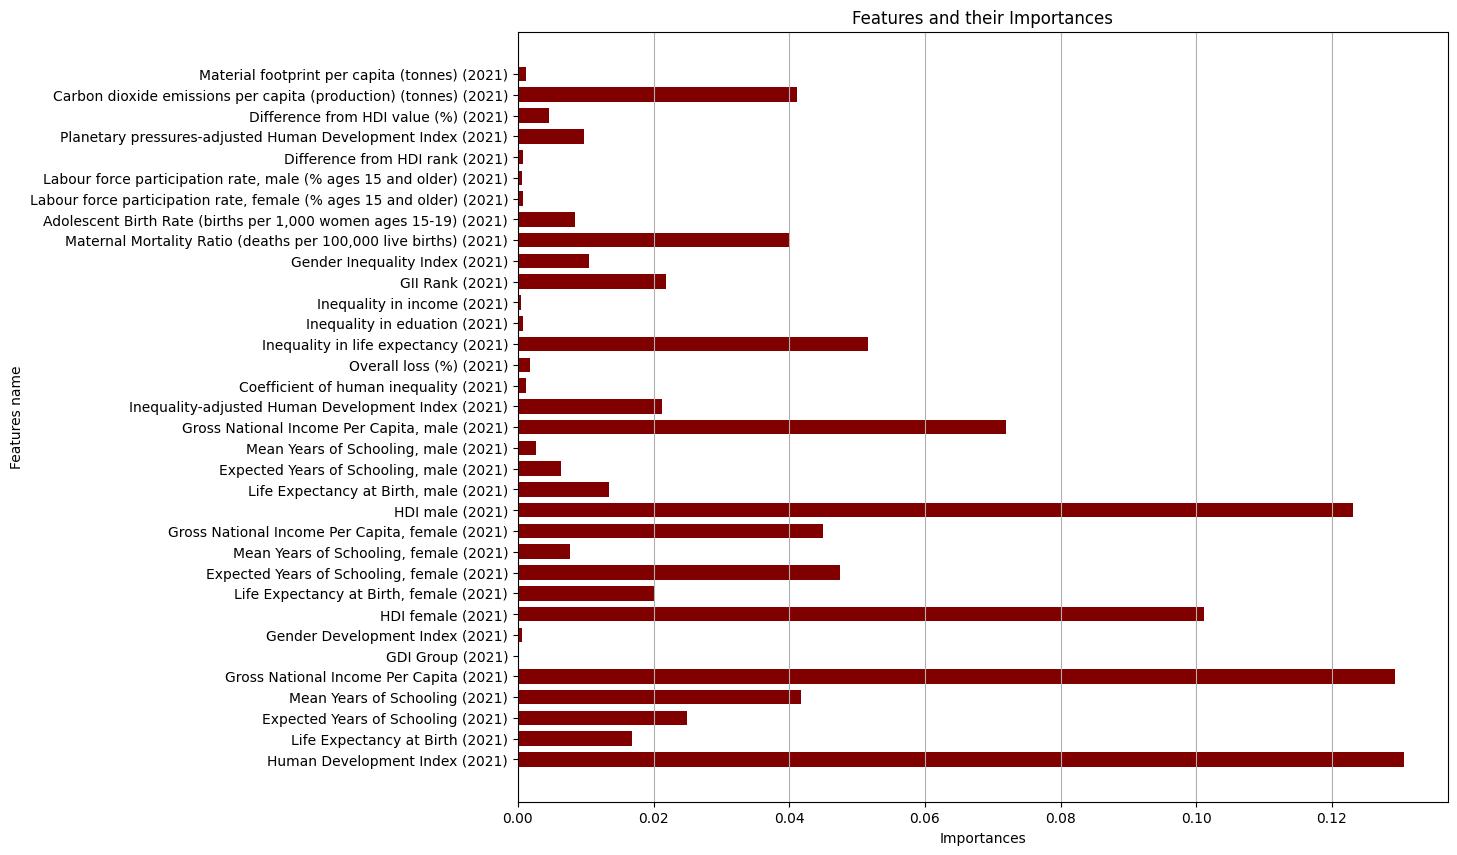

In [21]:
plt.figure(figsize=(12, 10))
plt.barh(X_train.columns,rf_regressor.feature_importances_,height=0.7,color='maroon')

plt.xlabel("Importances")
plt.ylabel("Features name")
plt.title("Features and their Importances")
plt.grid(axis='x')
plt.show()


### Data weighting

In [24]:
X_train_scaled_weighted=X_train_scaled*rf_regressor.feature_importances_
X_test_scaled_weighted=X_test_scaled*rf_regressor.feature_importances_

## Model selection

### linear Regression

In [25]:
linear_reg_model=LinearRegression()

In [26]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False],  
    'copy_X': [True, False],
    'n_jobs': [-1, None, 1, 2, 4] 
}

In [28]:
grid_search_lr=GridSearchCV(estimator=linear_reg_model,param_grid=param_grid_lr)

In [29]:
grid_search_lr.fit(X_train_scaled_weighted,y_train)

,estimator,LinearRegression()
,param_grid,"{'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [-1, None, ...], 'positive': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,True


In [32]:
print(f"Best params of linear regression : {grid_search_lr.best_params_}")
print(f"Best score : { grid_search_lr.best_score_}")

Best params of linear regression : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best score : 0.9830869793338864


In [ ]:
linear_reg_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1,positive=False)

In [36]:
linear_reg_model.fit(X_train_scaled_weighted,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [37]:
y_pred=linear_reg_model.predict(X_test_scaled_weighted)

#### Model evaluation

In [40]:
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MSE : {mean_squared_error(y_test,y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")

R2 Score : 0.9850245117067848
MAE : 4.921125615724107
MSE : 49.637570364487004
RMSE : 7.045393556394632


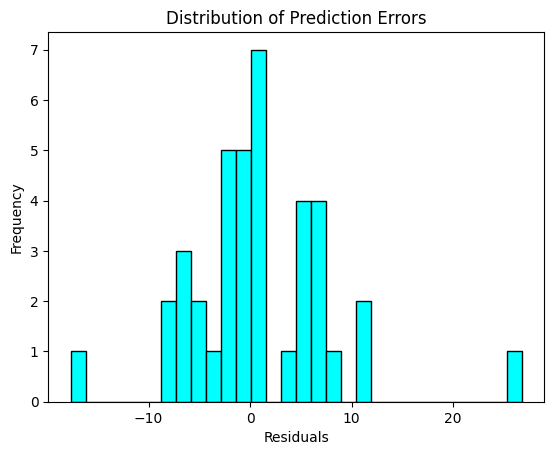

In [43]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black',color='cyan')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


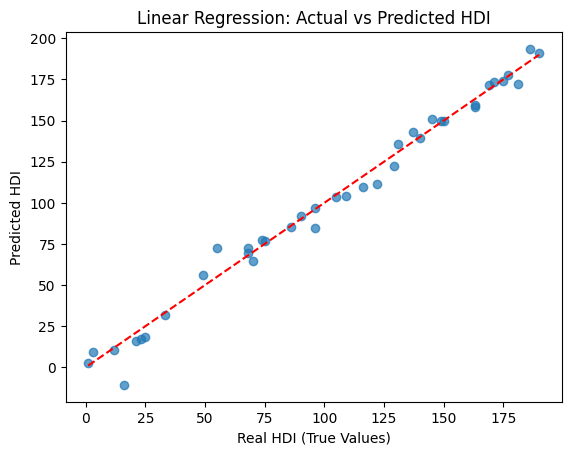

In [42]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real HDI (True Values)")
plt.ylabel("Predicted HDI")
plt.title("Linear Regression: Actual vs Predicted HDI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()